# Clustering to Annotate All Cells

### 1. Import Required Packages 
### 2. Import Prior Data 
### 3. Annotate Cells in New Column based on Previous Analyses
### 4. Determine Top 2000 Variable Genes
### 5. Train New Model with Cells Fully Annotated
### 6. Determine Marker Genes on Labled Cells
### 7. Save Everything
### 8. Conclusion

## <br> 1. Import Required Packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scanpy as sc
import scvi
import anndata as ad
import seaborn as sns

from scvi.model.utils import mde
from scipy import sparse
from anndata import AnnData
from anndata.experimental.multi_files import AnnCollection

[rank: 0] Global seed set to 0


Set figure parameters.

In [2]:
sc.set_figure_params(figsize=(5,5))
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}
%config InlineBackend.figure_format='retina'
pd.options.display.max_colwidth = 200

## <br> 2. Import Prior Clustered Data

In [38]:
adata = ad.read_h5ad('./Adata_Objects/01b_AllGenes_Clustered.h5ad')
adata_immune = ad.read_h5ad('./Adata_Objects/01e_AllGenes_Clustered_Macro.h5ad')
adata_endo = ad.read_h5ad('./Adata_Objects/01e_AllGenes_Clustered_Endo.h5ad')

In [39]:
print(adata.raw)
print(adata_immune.raw)
print(adata_endo.raw)

Raw AnnData with n_obs × n_vars = 263074 × 22917
Raw AnnData with n_obs × n_vars = 6400 × 22917
Raw AnnData with n_obs × n_vars = 25125 × 22917


In [40]:
print(adata) 
print()
print(adata_immune)
print()
print(adata_endo)

AnnData object with n_obs × n_vars = 263074 × 22917
    obs: 'Dose', 'Time', 'OrigIdent', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes', 'Barcode', 'OrigIdent-Barcode', 'Seurat_Celltype', 'doublet_scores', 'predicted_doublets', 'doublet_info', 'leiden_scVI_res_0.05', 'leiden_scVI_res_0.1', 'leiden_scVI_res_0.25', 'leiden_scVI_res_0.5', 'leiden_scVI_res_0.75', 'leiden_scVI_res_1.50'
    uns: 'OrigIdent_colors', 'doublet_info_colors', 'leiden', 'log1p', 'neighbors', 'umap'
    obsm: 'X_scVI', 'X_umap'
    layers: 'counts', 'log1p_counts'
    obsp: 'connectivities', 'distances'

AnnData object with n_obs × n_vars = 6400 × 22917
    obs: 'Dose', 'Time', 'OrigIdent', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes', 'Barcode', 'OrigIdent-Barcode', 'Seurat_Celltype', 'doublet_scores', 'predicted_doublets', 'doublet_info', 'leiden_scVI_res_0.05', 'leiden_scVI_res_0.1', 'leiden_scVI_res_0.25', 'leiden_scVI_res_0.5', 'leiden

## <br> 3. Annotate Cells in New Column based on Previous Analyses

In [77]:
bdata = adata.copy()

In [78]:
bdata.obs['Celltype'] = "Null"

/mnt/home/cholicog/miniconda3/envs/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


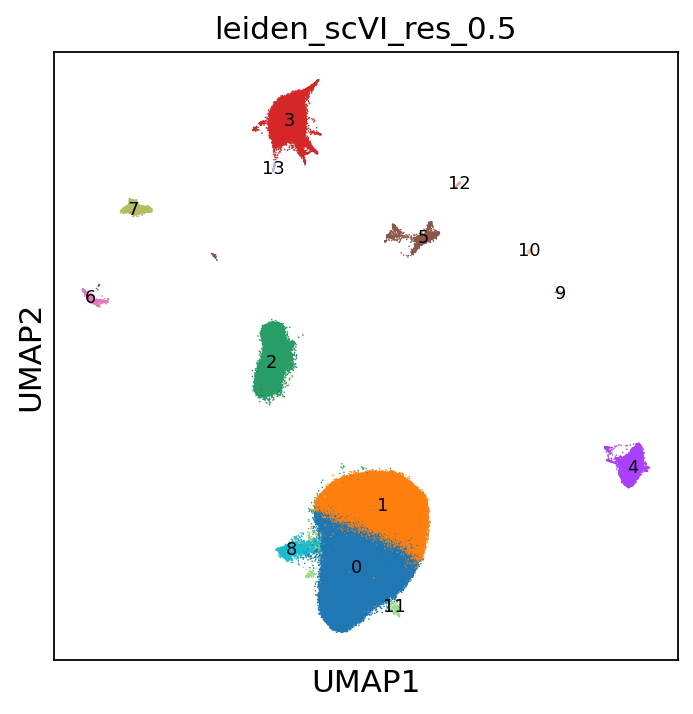

In [79]:
sc.pl.umap(
    bdata,
    color=["leiden_scVI_res_0.5"],
    legend_loc="on data",
    legend_fontsize=8,
    legend_fontweight='normal',
    frameon=True,
    size=2,
    #palette = sns.color_palette("hls", 10),
    #save='Annotated_Cells_For_Publishing-TCDDOnly.pdf'
)

/mnt/home/cholicog/miniconda3/envs/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


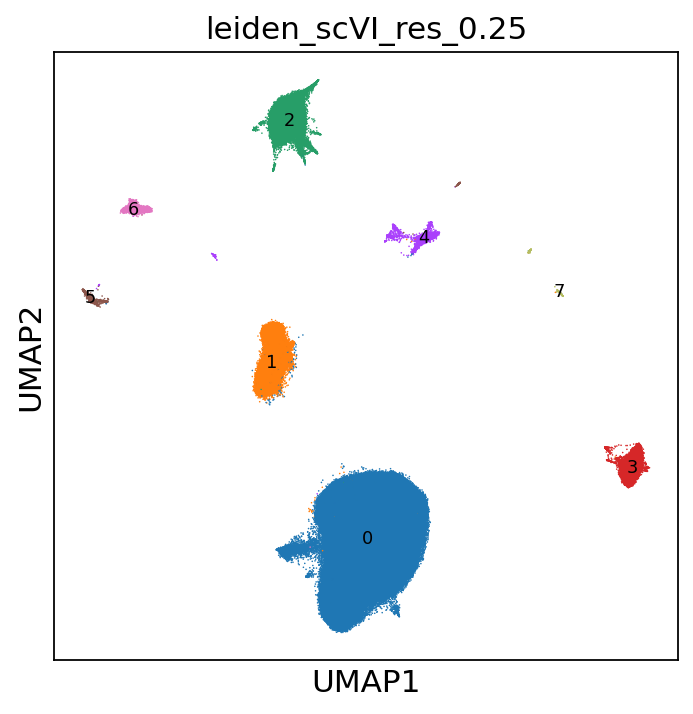

In [80]:
sc.pl.umap(
    bdata,
    color=["leiden_scVI_res_0.25"],
    legend_loc="on data",
    legend_fontsize=8,
    legend_fontweight='normal',
    frameon=True,
    size=2,
    #palette = sns.color_palette("hls", 10),
    #save='Annotated_Cells_For_Publishing-TCDDOnly.pdf'
)

In [81]:
bdata.obs['Celltype'] = np.where(bdata.obs['leiden_scVI_res_0.5'] == '12', "pDCs", bdata.obs['Celltype'])

bdata.obs['Celltype'] = np.where(bdata.obs['leiden_scVI_res_0.5'] == '5', "Macrophages", bdata.obs['Celltype'])

bdata.obs['Celltype'] = np.where(bdata.obs['leiden_scVI_res_0.5'] == '6', "B Cells", bdata.obs['Celltype'])
bdata.obs['Celltype'] = np.where(bdata.obs['leiden_scVI_res_0.5'] == '7', "T Cells", bdata.obs['Celltype'])
bdata.obs['Celltype'] = np.where(bdata.obs['leiden_scVI_res_0.5'] == '9', "PFs", bdata.obs['Celltype'])
bdata.obs['Celltype'] = np.where(bdata.obs['leiden_scVI_res_0.5'] == '10', "Cholangiocytes", bdata.obs['Celltype'])
bdata.obs['Celltype'] = np.where(bdata.obs['leiden_scVI_res_0.5'] == '3', "ECs", bdata.obs['Celltype'])
bdata.obs['Celltype'] = np.where(bdata.obs['leiden_scVI_res_0.5'] == '13', "ECs", bdata.obs['Celltype'])
bdata.obs['Celltype'] = np.where(bdata.obs['leiden_scVI_res_0.5'] == '4', "HSCs", bdata.obs['Celltype'])


bdata.obs['Celltype'] = np.where(bdata.obs['leiden_scVI_res_0.25'] == '0', "Hepatocytes", bdata.obs['Celltype'])
bdata.obs['Celltype'] = np.where(bdata.obs['leiden_scVI_res_0.25'] == '1', "Hepatocytes", bdata.obs['Celltype'])

In [82]:
# Macro_Barcodes = pd.DataFrame(adata_immune.obs['OrigIdent-Barcode']
#                              [(adata_immune.obs['leiden_scVI_res_0.1_macro'] == '0')|
#                               (adata_immune.obs['leiden_scVI_res_0.1_macro'] == '2')|
#                               (adata_immune.obs['leiden_scVI_res_0.1_macro'] == '1')|
#                               (adata_immune.obs['leiden_scVI_res_0.1_macro'] == '4')])
# Macro_Barcodes["Macrophages"] = "TRUE"
# bdata.obs = bdata.obs.merge(Macro_Barcodes, on="OrigIdent-Barcode", how="left")
# bdata.obs['Celltype'] = np.where(bdata.obs['Macrophages'] == 'TRUE', "Macrophages", bdata.obs['Celltype'])

In [83]:
Neutrophil_Barcodes = pd.DataFrame(adata_immune.obs['OrigIdent-Barcode']
                              [adata_immune.obs['leiden_scVI_res_0.1_macro'] == '3'])
Neutrophil_Barcodes["Neutrophil"] = "TRUE"
bdata.obs = bdata.obs.merge(Neutrophil_Barcodes, on="OrigIdent-Barcode", how="left")
bdata.obs['Celltype'] = np.where(bdata.obs['Neutrophil'] == 'TRUE', "Neutrophils", bdata.obs['Celltype'])

/mnt/home/cholicog/miniconda3/envs/scvi-env/lib/python3.9/site-packages/anndata/_core/anndata.py:782: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [0, 1, 2, 3, 4]

    Inferred to be: integer

  value_idx = self._prep_dim_index(value.index, attr)


### 3.1 Label Cell Subtypes

In [84]:
bdata.obs['Cell_Subtype'] = "Null"

In [85]:
bdata.obs['Cell_Subtype'] = np.where(bdata.obs['Celltype'] == 'B Cells', "B Cells", bdata.obs['Cell_Subtype'])
bdata.obs['Cell_Subtype'] = np.where(bdata.obs['Celltype'] == 'T Cells', "T Cells", bdata.obs['Cell_Subtype'])
bdata.obs['Cell_Subtype'] = np.where(bdata.obs['Celltype'] == 'PFs', "PFs", bdata.obs['Cell_Subtype'])
bdata.obs['Cell_Subtype'] = np.where(bdata.obs['Celltype'] == 'Cholangiocytes', "Cholangiocytes", bdata.obs['Cell_Subtype'])
bdata.obs['Cell_Subtype'] = np.where(bdata.obs['Celltype'] == 'HSCs', "HSCs", bdata.obs['Cell_Subtype'])
bdata.obs['Cell_Subtype'] = np.where(bdata.obs['Celltype'] == 'pDCs', "pDCs", bdata.obs['Cell_Subtype'])
bdata.obs['Cell_Subtype'] = np.where(bdata.obs['Celltype'] == 'Hepatocytes', "Hepatocytes", bdata.obs['Cell_Subtype'])
bdata.obs['Cell_Subtype'] = np.where(bdata.obs['Celltype'] == 'Neutrophils', "Neutrophils", bdata.obs['Cell_Subtype'])


In [86]:
KC_Barcodes = pd.DataFrame(adata_immune.obs['OrigIdent-Barcode']
                             [(adata_immune.obs['leiden_scVI_res_0.1_macro'] == '0')|
                              (adata_immune.obs['leiden_scVI_res_0.1_macro'] == '2')|
                              (adata_immune.obs['leiden_scVI_res_0.1_macro'] == '4')])
KC_Barcodes["KCs"] = "TRUE"
bdata.obs = bdata.obs.merge(KC_Barcodes, on="OrigIdent-Barcode", how="left")
bdata.obs['Cell_Subtype'] = np.where(bdata.obs['KCs'] == 'TRUE', "KCs", bdata.obs['Cell_Subtype'])

/mnt/home/cholicog/miniconda3/envs/scvi-env/lib/python3.9/site-packages/anndata/_core/anndata.py:782: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [0, 1, 2, 3, 4]

    Inferred to be: integer

  value_idx = self._prep_dim_index(value.index, attr)


In [87]:
MDM_Barcodes = pd.DataFrame(adata_immune.obs['OrigIdent-Barcode']
                             [(adata_immune.obs['leiden_scVI_res_0.1_macro'] == '1')])
MDM_Barcodes["MDMs"] = "TRUE"
bdata.obs = bdata.obs.merge(MDM_Barcodes, on="OrigIdent-Barcode", how="left")
bdata.obs['Cell_Subtype'] = np.where(bdata.obs['MDMs'] == 'TRUE', "MDMs", bdata.obs['Cell_Subtype'])

/mnt/home/cholicog/miniconda3/envs/scvi-env/lib/python3.9/site-packages/anndata/_core/anndata.py:782: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [0, 1, 2, 3, 4]

    Inferred to be: integer

  value_idx = self._prep_dim_index(value.index, attr)


In [88]:
Pericentral_LSECs_Barcodes = pd.DataFrame(adata_endo.obs['OrigIdent-Barcode']
                             [(adata_endo.obs['leiden_scVI_res_0.5_endo'] == '0')])
Pericentral_LSECs_Barcodes["Pericentral_LSECs"] = "TRUE"
bdata.obs = bdata.obs.merge(Pericentral_LSECs_Barcodes, on="OrigIdent-Barcode", how="left")
bdata.obs['Cell_Subtype'] = np.where(bdata.obs['Pericentral_LSECs'] == 'TRUE', "Pericentral_LSECs", bdata.obs['Cell_Subtype'])


/mnt/home/cholicog/miniconda3/envs/scvi-env/lib/python3.9/site-packages/anndata/_core/anndata.py:782: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [0, 1, 2, 3, 4]

    Inferred to be: integer

  value_idx = self._prep_dim_index(value.index, attr)


In [89]:
Midzonal_LSECs_Barcodes = pd.DataFrame(adata_endo.obs['OrigIdent-Barcode']
                             [(adata_endo.obs['leiden_scVI_res_0.5_endo'] == '1')])
Midzonal_LSECs_Barcodes["Midzonal_LSECs"] = "TRUE"
bdata.obs = bdata.obs.merge(Midzonal_LSECs_Barcodes, on="OrigIdent-Barcode", how="left")
bdata.obs['Cell_Subtype'] = np.where(bdata.obs['Midzonal_LSECs'] == 'TRUE', "Midzonal LSECs", bdata.obs['Cell_Subtype'])


/mnt/home/cholicog/miniconda3/envs/scvi-env/lib/python3.9/site-packages/anndata/_core/anndata.py:782: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [0, 1, 2, 3, 4]

    Inferred to be: integer

  value_idx = self._prep_dim_index(value.index, attr)


In [90]:
Periportal_LSECs_Barcodes = pd.DataFrame(adata_endo.obs['OrigIdent-Barcode']
                             [(adata_endo.obs['leiden_scVI_res_0.5_endo'] == '2')])
Periportal_LSECs_Barcodes["Periportal_LSECs"] = "TRUE"
bdata.obs = bdata.obs.merge(Periportal_LSECs_Barcodes, on="OrigIdent-Barcode", how="left")
bdata.obs['Cell_Subtype'] = np.where(bdata.obs['Periportal_LSECs'] == 'TRUE', "Periportal LSECs", bdata.obs['Cell_Subtype'])


/mnt/home/cholicog/miniconda3/envs/scvi-env/lib/python3.9/site-packages/anndata/_core/anndata.py:782: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [0, 1, 2, 3, 4]

    Inferred to be: integer

  value_idx = self._prep_dim_index(value.index, attr)


In [91]:
PECs_Barcodes = pd.DataFrame(adata_endo.obs['OrigIdent-Barcode']
                             [(adata_endo.obs['leiden_scVI_res_0.5_endo'] == '3')])
PECs_Barcodes["PECs"] = "TRUE"
bdata.obs = bdata.obs.merge(PECs_Barcodes, on="OrigIdent-Barcode", how="left")
bdata.obs['Cell_Subtype'] = np.where(bdata.obs['PECs'] == 'TRUE', "PECs", bdata.obs['Cell_Subtype'])


/mnt/home/cholicog/miniconda3/envs/scvi-env/lib/python3.9/site-packages/anndata/_core/anndata.py:782: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [0, 1, 2, 3, 4]

    Inferred to be: integer

  value_idx = self._prep_dim_index(value.index, attr)


In [92]:
LyECs_Barcodes = pd.DataFrame(adata_endo.obs['OrigIdent-Barcode']
                             [(adata_endo.obs['leiden_scVI_res_0.5_endo'] == '4')])
LyECs_Barcodes["LyECs"] = "TRUE"
bdata.obs = bdata.obs.merge(LyECs_Barcodes, on="OrigIdent-Barcode", how="left")
bdata.obs['Cell_Subtype'] = np.where(bdata.obs['LyECs'] == 'TRUE', "LyECs", bdata.obs['Cell_Subtype'])


/mnt/home/cholicog/miniconda3/envs/scvi-env/lib/python3.9/site-packages/anndata/_core/anndata.py:782: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [0, 1, 2, 3, 4]

    Inferred to be: integer

  value_idx = self._prep_dim_index(value.index, attr)


In [93]:
Periportal_VECs_Barcodes = pd.DataFrame(adata_endo.obs['OrigIdent-Barcode']
                             [(adata_endo.obs['leiden_scVI_res_0.5_endo'] == '5')])
Periportal_VECs_Barcodes["Periportal_VECs"] = "TRUE"
bdata.obs = bdata.obs.merge(Periportal_VECs_Barcodes, on="OrigIdent-Barcode", how="left")
bdata.obs['Cell_Subtype'] = np.where(bdata.obs['Periportal_VECs'] == 'TRUE', "Periportal VECs", bdata.obs['Cell_Subtype'])


/mnt/home/cholicog/miniconda3/envs/scvi-env/lib/python3.9/site-packages/anndata/_core/anndata.py:782: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [0, 1, 2, 3, 4]

    Inferred to be: integer

  value_idx = self._prep_dim_index(value.index, attr)


In [94]:
Unknown_ECs_Barcodes = pd.DataFrame(adata_endo.obs['OrigIdent-Barcode']
                             [(adata_endo.obs['leiden_scVI_res_0.5_endo'] == '6')])
Unknown_ECs_Barcodes["Unknown_ECs"] = "TRUE"
bdata.obs = bdata.obs.merge(Unknown_ECs_Barcodes, on="OrigIdent-Barcode", how="left")
bdata.obs['Cell_Subtype'] = np.where(bdata.obs['Unknown_ECs'] == 'TRUE', "Unknown ECs", bdata.obs['Cell_Subtype'])


/mnt/home/cholicog/miniconda3/envs/scvi-env/lib/python3.9/site-packages/anndata/_core/anndata.py:782: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [0, 1, 2, 3, 4]

    Inferred to be: integer

  value_idx = self._prep_dim_index(value.index, attr)


In [95]:
Pericentral_VECs_Barcodes = pd.DataFrame(adata_endo.obs['OrigIdent-Barcode']
                             [(adata_endo.obs['leiden_scVI_res_0.5_endo'] == '7')])
Pericentral_VECs_Barcodes["Pericentral_VECs"] = "TRUE"
bdata.obs = bdata.obs.merge(Pericentral_VECs_Barcodes, on="OrigIdent-Barcode", how="left")
bdata.obs['Cell_Subtype'] = np.where(bdata.obs['Pericentral_VECs'] == 'TRUE', "Pericentral VECs", bdata.obs['Cell_Subtype'])


/mnt/home/cholicog/miniconda3/envs/scvi-env/lib/python3.9/site-packages/anndata/_core/anndata.py:782: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [0, 1, 2, 3, 4]

    Inferred to be: integer

  value_idx = self._prep_dim_index(value.index, attr)


### 3.2 Verify UMAPs

/mnt/home/cholicog/miniconda3/envs/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


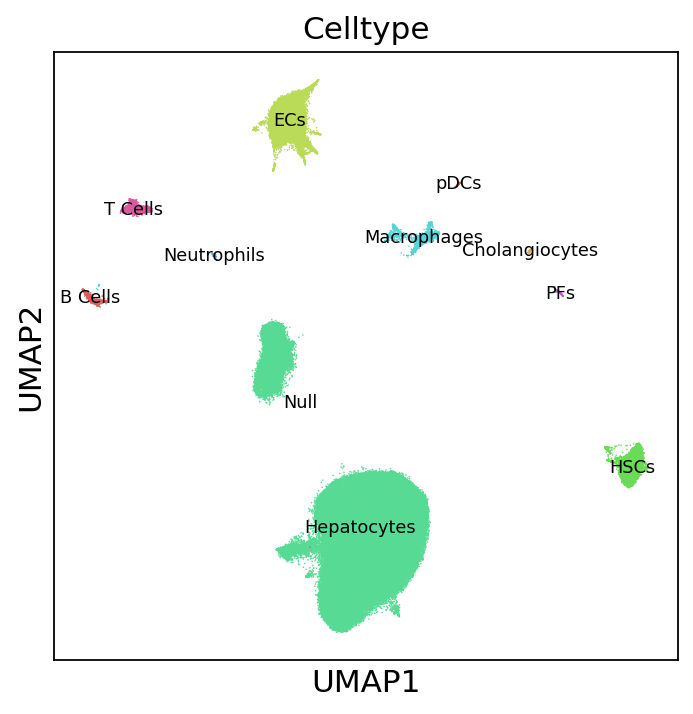

In [96]:
sc.pl.umap(
    bdata,
    color=["Celltype"],
    legend_loc="on data",
    legend_fontsize=8,
    legend_fontweight='normal',
    frameon=True,
    size=2,
    palette = sns.color_palette("hls", 10),
    #save='Annotated_Cells_For_Publishing-TCDDOnly.pdf'
)

/mnt/home/cholicog/miniconda3/envs/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


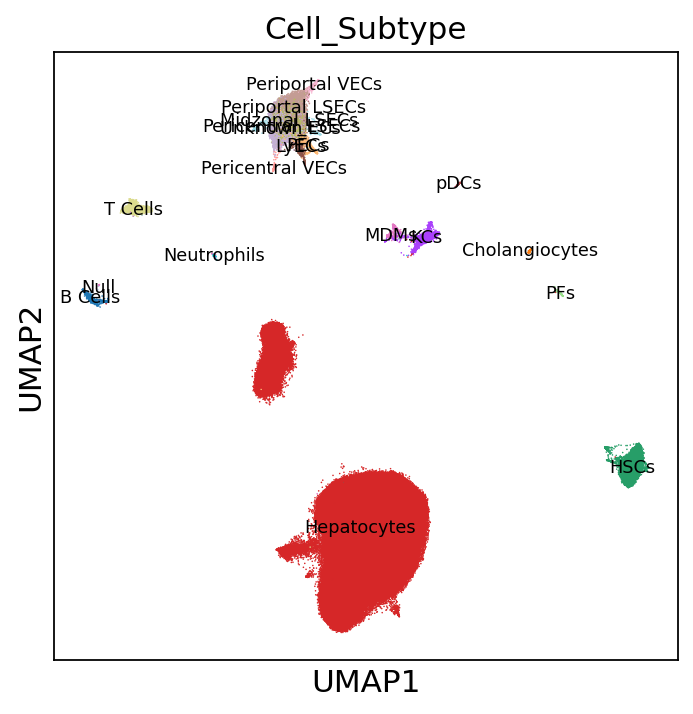

In [97]:
sc.pl.umap(
    bdata,
    color=["Cell_Subtype"],
    legend_loc="on data",
    legend_fontsize=8,
    legend_fontweight='normal',
    frameon=True,
    size=2,
    #palette = sns.color_palette("hls", 10),
    #save='Annotated_Cells_For_Publishing-TCDDOnly.pdf'
)

In [98]:
bdata.obs['Celltype'].unique()

['Hepatocytes', 'ECs', 'Macrophages', 'HSCs', 'T Cells', ..., 'B Cells', 'pDCs', 'Neutrophils', 'Cholangiocytes', 'Null']
Length: 11
Categories (11, object): ['B Cells', 'Cholangiocytes', 'ECs', 'HSCs', ..., 'Null', 'PFs', 'T Cells', 'pDCs']

In [99]:
bdata.obs['Celltype'].value_counts()

Hepatocytes       212178
ECs                25123
HSCs                9408
Macrophages         6105
B Cells             4262
T Cells             4133
PFs                  722
Cholangiocytes       546
pDCs                 297
Neutrophils          296
Null                   4
Name: Celltype, dtype: int64

In [100]:
bdata.obs.Celltype = bdata.obs.Celltype.astype("category")
bdata.obs.Celltype = bdata.obs['Celltype'].cat.reorder_categories(['Hepatocytes', 'ECs', 'HSCs', 'Macrophages',  'B Cells', 
                                                                   'T Cells', 'PFs', 'Cholangiocytes', 'pDCs',
                                                                   'Neutrophils', "Null"])#, 'Unknown'])


In [101]:
bdata.obs.index = bdata.obs.index.astype(str)

In [102]:
bdata = bdata[bdata.obs['Celltype'] != "Null"]

/mnt/home/cholicog/miniconda3/envs/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_utils.py:430: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list
/mnt/home/cholicog/miniconda3/envs/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


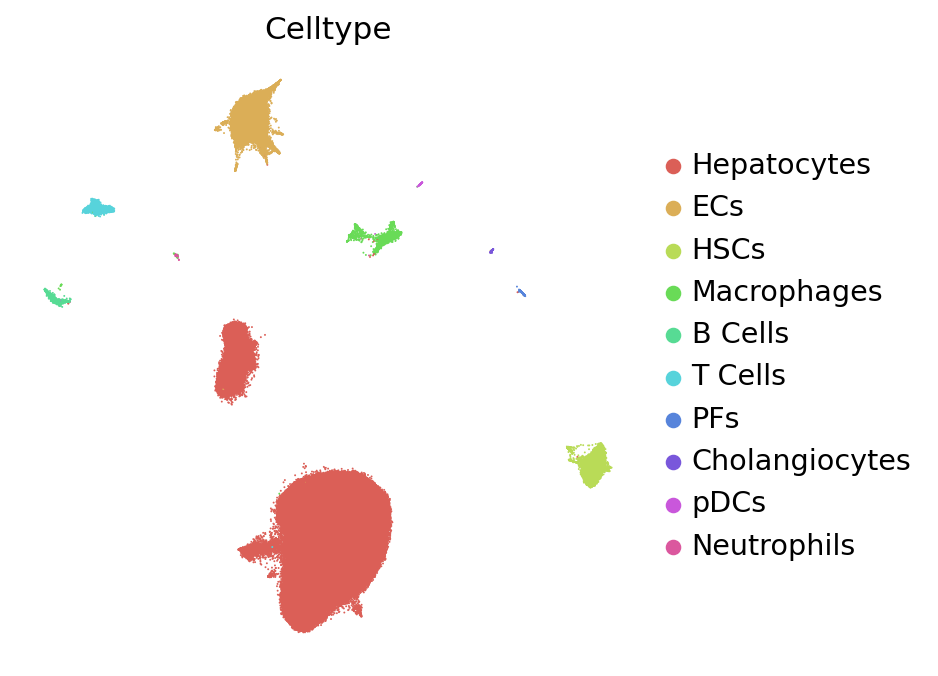

In [103]:
sc.pl.umap(
    bdata,
    color=["Celltype"],
    frameon=False,
    palette = sns.color_palette("hls", 10),
    size=3,
    #save='_Clustering-Celltype_FINAL.pdf'
)

/mnt/home/cholicog/miniconda3/envs/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


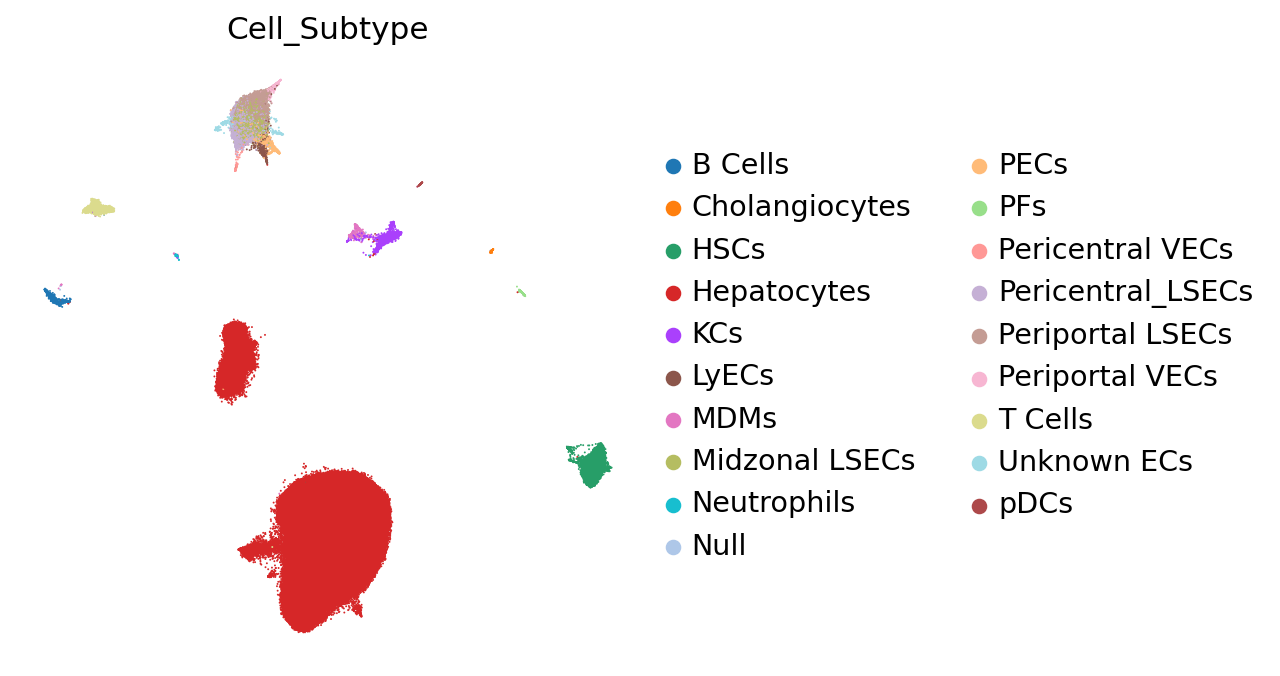

In [104]:
sc.pl.umap(
    bdata,
    color=["Cell_Subtype"],
    frameon=False,
    #palette = sns.color_palette("hls", 10),
    size=3,
    #save='_Clustering-Celltype_FINAL.pdf'
)

/mnt/home/cholicog/miniconda3/envs/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/mnt/home/cholicog/miniconda3/envs/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


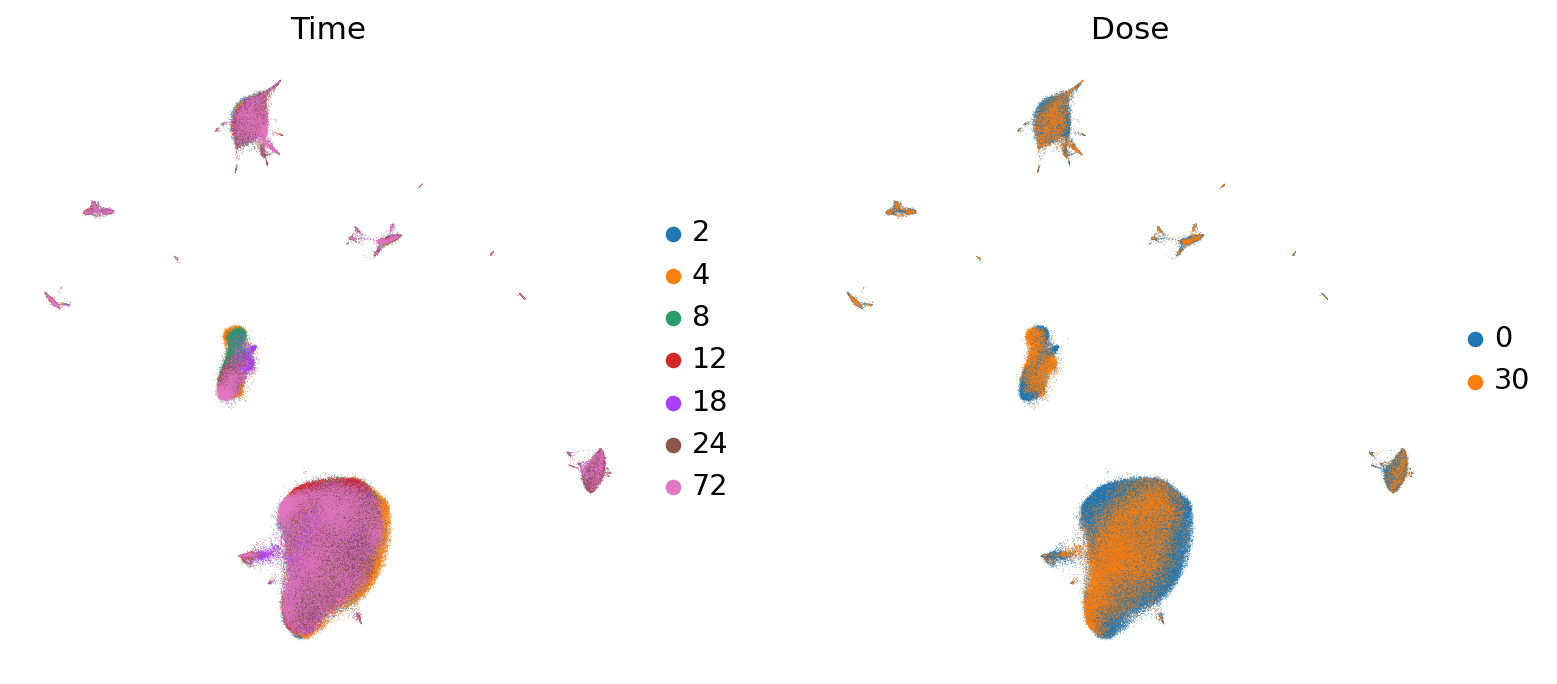

In [105]:
sc.pl.umap(
    bdata,
    color=["Time", "Dose"],
    ncols=2,
    frameon=False,
)

In [106]:
cdata = bdata.copy()

In [107]:
print(cdata)

AnnData object with n_obs × n_vars = 263070 × 22917
    obs: 'Dose', 'Time', 'OrigIdent', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes', 'Barcode', 'OrigIdent-Barcode', 'Seurat_Celltype', 'doublet_scores', 'predicted_doublets', 'doublet_info', 'leiden_scVI_res_0.05', 'leiden_scVI_res_0.1', 'leiden_scVI_res_0.25', 'leiden_scVI_res_0.5', 'leiden_scVI_res_0.75', 'leiden_scVI_res_1.50', 'Celltype', 'Neutrophil', 'Cell_Subtype', 'KCs', 'MDMs', 'Pericentral_LSECs', 'Midzonal_LSECs', 'Periportal_LSECs', 'PECs', 'LyECs', 'Periportal_VECs', 'Unknown_ECs', 'Pericentral_VECs'
    uns: 'OrigIdent_colors', 'doublet_info_colors', 'leiden', 'log1p', 'neighbors', 'umap', 'leiden_scVI_res_0.5_colors', 'leiden_scVI_res_0.25_colors', 'Celltype_colors', 'Cell_Subtype_colors', 'Time_colors', 'Dose_colors'
    obsm: 'X_scVI', 'X_umap'
    layers: 'counts', 'log1p_counts'
    obsp: 'connectivities', 'distances'


In [108]:
cdata.obs = cdata.obs[['Dose', 'Time', 'OrigIdent', 'Celltype','Cell_Subtype',
                       'n_genes_by_counts', 'total_counts', 
                       'total_counts_mt', 'pct_counts_mt', 'n_genes', 
                       'Barcode', 'OrigIdent-Barcode', 'Seurat_Celltype', 
                       'doublet_scores', 'predicted_doublets', 'doublet_info', 
                       'leiden_scVI_res_0.05', 'leiden_scVI_res_0.1', 'leiden_scVI_res_0.25', 
                       'leiden_scVI_res_0.5', 'leiden_scVI_res_0.75', 'leiden_scVI_res_1.50']]

In [109]:
print(cdata)

AnnData object with n_obs × n_vars = 263070 × 22917
    obs: 'Dose', 'Time', 'OrigIdent', 'Celltype', 'Cell_Subtype', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes', 'Barcode', 'OrigIdent-Barcode', 'Seurat_Celltype', 'doublet_scores', 'predicted_doublets', 'doublet_info', 'leiden_scVI_res_0.05', 'leiden_scVI_res_0.1', 'leiden_scVI_res_0.25', 'leiden_scVI_res_0.5', 'leiden_scVI_res_0.75', 'leiden_scVI_res_1.50'
    uns: 'OrigIdent_colors', 'doublet_info_colors', 'leiden', 'log1p', 'neighbors', 'umap', 'leiden_scVI_res_0.5_colors', 'leiden_scVI_res_0.25_colors', 'Celltype_colors', 'Cell_Subtype_colors', 'Time_colors', 'Dose_colors'
    obsm: 'X_scVI', 'X_umap'
    layers: 'counts', 'log1p_counts'
    obsp: 'connectivities', 'distances'


# <br> 6. Determine Marker Genes on Labled Cells

In [110]:
sc.pp.log1p(cdata)

In [111]:
sc.tl.rank_genes_groups(cdata, 
                        'Celltype', 
                        method='wilcoxon', 
                        key_added = "Celltype_Wilcoxon")

/mnt/home/cholicog/miniconda3/envs/scvi-env/lib/python3.9/site-packages/numba/core/dispatcher.py:289: UserWarning: Numba extension module 'sparse._numba_extension' failed to load due to 'ModuleNotFoundError(No module named 'numba.targets')'.
  entrypoints.init_all()


### <br> Example on how to view results

In [112]:
sc.get.rank_genes_groups_df(cdata, 
                            group='pDCs', 
                            key='Celltype_Wilcoxon')[:10]

,names,scores,logfoldchanges,pvals,pvals_adj
0,Tcf4,29.515377,5.059731,1.827857e-191,4.188900e-187
1,Runx2,28.259399,9.670322,1.090979e-175,1.250098e-171
2,Irf8,28.149437,8.148088,2.434732e-174,1.859891e-170
3,Card11,27.993368,8.501875,1.956780e-172,1.121088e-168
4,Bcl11a,26.806847,8.936511,2.688751e-158,1.232362e-154
5,Mctp2,26.791147,3.994332,4.097706e-158,1.565119e-154
6,Fyn,26.718918,5.771568,2.837698e-157,9.290217e-154
7,Srgap3,26.449381,8.568009,3.709080e-154,1.062512e-150
8,Prkca,26.418421,3.994811,8.417806e-154,2.143454e-150
9,Dock2,26.357281,6.409720,4.235115e-153,9.705612e-150


### <br> Example on how to plot results

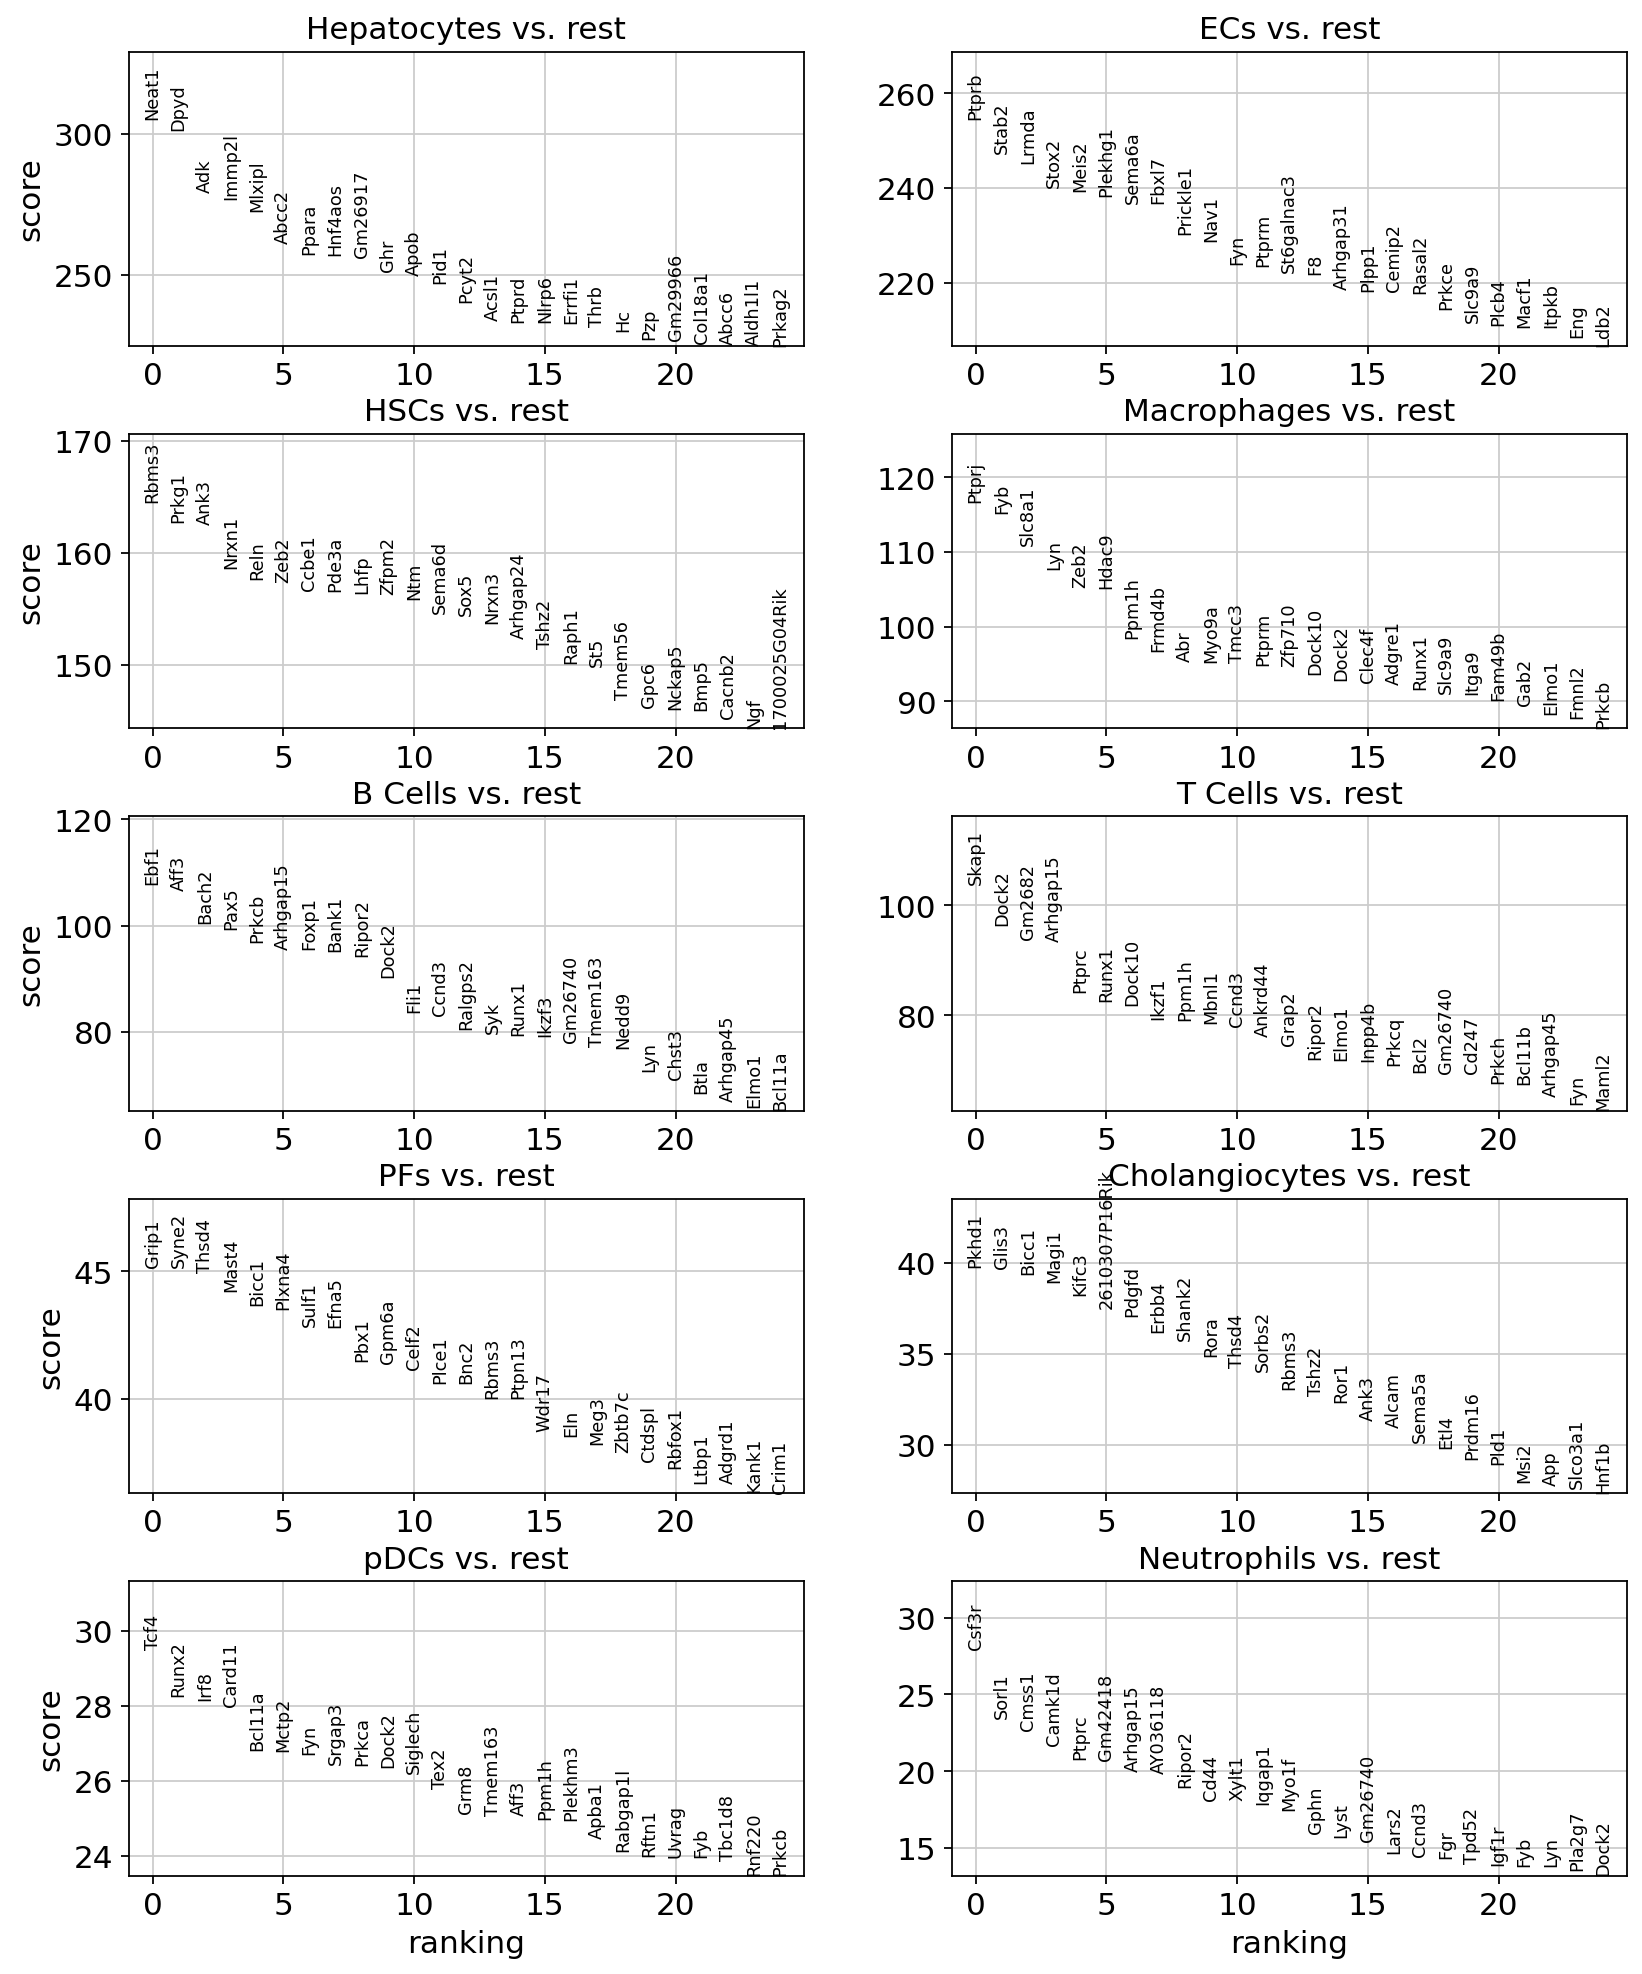

In [113]:
sc.set_figure_params(figsize=(6,3))

sc.pl.rank_genes_groups(cdata, 
                        n_genes=25, 
                        sharey=False, 
                        key="Celltype_Wilcoxon",
                        ncols=2,
                        save='_Ranked_Genes_For_Each_Celltype.pdf'
                       )

# <br> 7. Save Everything

In [114]:
cdata

AnnData object with n_obs × n_vars = 263070 × 22917
    obs: 'Dose', 'Time', 'OrigIdent', 'Celltype', 'Cell_Subtype', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes', 'Barcode', 'OrigIdent-Barcode', 'Seurat_Celltype', 'doublet_scores', 'predicted_doublets', 'doublet_info', 'leiden_scVI_res_0.05', 'leiden_scVI_res_0.1', 'leiden_scVI_res_0.25', 'leiden_scVI_res_0.5', 'leiden_scVI_res_0.75', 'leiden_scVI_res_1.50'
    uns: 'OrigIdent_colors', 'doublet_info_colors', 'leiden', 'log1p', 'neighbors', 'umap', 'leiden_scVI_res_0.5_colors', 'leiden_scVI_res_0.25_colors', 'Celltype_colors', 'Cell_Subtype_colors', 'Time_colors', 'Dose_colors', 'Celltype_Wilcoxon'
    obsm: 'X_scVI', 'X_umap'
    layers: 'counts', 'log1p_counts'
    obsp: 'connectivities', 'distances'

Add more metadata

In [115]:
cdata.obs['OrigIdent_Celltype'] = cdata.obs['OrigIdent'].astype(str).str.cat(cdata.obs['Celltype'], sep="_")
cdata.obs['Dose_Time'] = cdata.obs['Dose'].astype(str).str.cat(cdata.obs['Time'], sep="_")



Save AnnData Object

In [116]:
cdata.write_h5ad('./Adata_Objects/01f_AllGenes_Clustered_And_Annotated_Cells.h5ad',compression='gzip')


# 8. Conclusions

In this notebook, a working adata object was created in which all clusters were annotated, and marker genes for each celltype were determined using SCVI.